# Imports

In [ ]:
!pip install tensorflow_addons

     |████████████████████████████████| 706kB 23.0MB/s 


In [ ]:
!pip install neptune-client==0.9.0
!pip install neptune-tensorflow-keras==0.9.1

     |████████████████████████████████| 215kB 26.9MB/s 
     |████████████████████████████████| 829kB 43.7MB/s 
     |████████████████████████████████| 71kB 11.3MB/s 
     |████████████████████████████████| 163kB 51.7MB/s 
     |████████████████████████████████| 133kB 54.1MB/s 
     |████████████████████████████████| 71kB 11.3MB/s 
     |████████████████████████████████| 71kB 11.7MB/s 
  Created wheel for neptune-client: filename=neptune_client-0.9.0-py2.py3-none-any.whl size=366639 sha256=6b76a29253414a122de057192f9e554aaffc1a0af5bfb7b0c6478664def2eebd
  Stored in directory: /root/.cache/pip/wheels/3f/5f/98/005b3b33f8a2f8f233bb133bf2630e622c512041ee3227f578
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=8ec15da3dda584b1623ae25fbe7a44fe5803e82705379478f8c0bc40189d3c4a
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
  Created wheel for strict-rfc3339: filename=strict_rfc3339-0.7-cp37-none

In [ ]:
import neptune.new as neptune

run = neptune.init(project='', api_token='')

https://app.neptune.ai/despdair/Subtask-2/e/SUB2-100


In [ ]:
from neptune.new.integrations.tensorflow_keras import NeptuneCallback

neptune_cbk = NeptuneCallback(run=run, base_namespace='metrics')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import tensorflow_addons as tfa
import gensim.downloader as api
import tensorflow_hub as hub

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
trainDfEng = pd.read_json("./en-train.json", lines = True)
trainDfEng.head()

,id,label,sentence
0,66133,0,He had also made headlines for kidnapping his ...
1,62058,0,___\n8:15 p.m.
2,66742,0,"Usually, it takes eight to nine months."
3,71549,0,"Terming the situation pathetic, Jairam said he..."
4,83223,0,'The freedom of the press depends on the right...


In [ ]:
testDf = pd.read_json("./test.json", lines = True)
testDf.head()

,id,sentence
0,64573,A child ran around in a T-shirt that read: New...
1,81433,"""BJP is not confident of winning Assembly elec..."
2,74797,Sources agreed that there was a backlog in thi...
3,75687,"As Step II , the Congress appears to have emba..."
4,81126,How Chinese goods became a victim of Pakistani...


In [ ]:
trainDfEng.drop_duplicates(subset= "sentence",inplace= True)

(array([18372.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4210.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

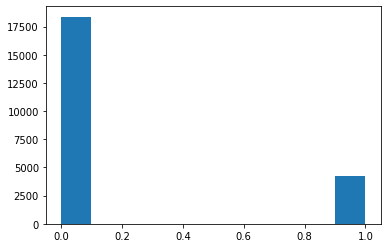

In [ ]:
plt.hist(trainDfEng["label"])

# Preprocessing

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk import word_tokenize

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

stop_words = set(stopwords.words('english'))
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()

def clean(text, stem = False):
    # Lowering letters
    text = text.lower()
    # Removing html tags
    text = re.sub('<[^>]*>', '', text)
    # Removing emails
    text = re.sub('\S*@\S*\s?', '', text)
    # Removing urls
    text = re.sub('https?://[A-Za-z0-9]','',text)
    # Removing numbers
    text = re.sub('[^a-zA-Z"]',' ',text)
    word_tokens = word_tokenize(text)    
    filtered_sentence = []
    for word_token in word_tokens:
      if stem:
        word_token = lemmatizer.lemmatize(word_token, "v")
        
      filtered_sentence.append(word_token)
    
    # Joining words
    text = (' '.join(filtered_sentence))
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
all_cleaned_texts = np.array([clean(text) for text in trainDfEng["sentence"]])

tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(all_cleaned_texts)

all_encoded_texts = tokenizer.texts_to_sequences(all_cleaned_texts)
all_encoded_texts = np.array(all_encoded_texts)

maxlen = max([len(sent) for sent in all_encoded_texts])
all_encoded_texts = tf.keras.preprocessing.sequence.pad_sequences(all_encoded_texts, maxlen= maxlen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2021-05-11 16:30:34--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-05-11 16:30:34--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-05-11 16:30:34--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
def getEmbedding(mode = "GN300"):
  import multiprocessing
  import gensim
  import gensim.downloader as api
  import os

  if mode == "customTrained":
    modelW2V = gensim.models.Word2Vec(all_cleaned_texts, size= 300, min_count = 2, window = 5, sg=0, iter = 10, workers= multiprocessing.cpu_count() - 1)
  elif mode == "GN300":
    word2vec = api.load("word2vec-google-news-300")
  elif mode == "glove":
    path_to_glove_file = os.path.join(
        "./glove.6B.300d.txt"
    )

    word2vec = {}
    with open(path_to_glove_file) as f:
        for line in f:
            word, coefs = line.split(maxsplit=1)
            coefs = np.fromstring(coefs, "f", sep=" ")
            word2vec[word] = coefs

    print("Found %s word vectors." % len(word2vec))
  else:
    word2vec = hub.load("https://tfhub.dev/google/nnlm-en-dim128/2")

  num_words = len(list(tokenizer.word_index))

  embedding_matrix = np.random.uniform(-1, 1, (num_words + 1, 300))
  for word, i in tokenizer.word_index.items():
      if i < num_words:
        try:
          embedding_vector = word2vec.get_vector(word)
          if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
          else:
            embedding_matrix[i] = np.zeros((300,))
        except:
          pass

  embedding_matrix[num_words] = np.zeros((300,))
  return embedding_matrix

EMBED_MODE = "glove"

embedding_matrix = getEmbedding(EMBED_MODE)

Found 400000 word vectors.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(all_encoded_texts, trainDfEng["label"], test_size=0.2, random_state=42)
# X_train = all_encoded_texts
# y_train = trainDfEng["label"]

In [ ]:
all_cleaned_texts = np.array([clean(text) for text in testDf["sentence"]])

# tokenizer = tf.keras.preprocessing.text.Tokenizer()
# tokenizer.fit_on_texts(all_cleaned_texts)

all_encoded_texts = tokenizer.texts_to_sequences(all_cleaned_texts)
all_encoded_texts = np.array(all_encoded_texts)

# maxlen = max([len(sent) for sent in all_encoded_texts])
all_encoded_texts = tf.keras.preprocessing.sequence.pad_sequences(all_encoded_texts, maxlen= maxlen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


In [ ]:
X_test = all_encoded_texts

# Model

In [ ]:
DROPOUT = 0.5
SEQ_DROPOUT = 0

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(input_dim= embedding_matrix.shape[0],
                                                              output_dim= embedding_matrix.shape[1],
                                                              weights = [embedding_matrix],
                                                              input_length= maxlen,
                                                             trainable = True),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(maxlen, dropout= DROPOUT, recurrent_dropout = SEQ_DROPOUT)),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(16, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ]
)

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=['accuracy', "AUC"])

In [ ]:
run["model_name"] = "LSTM"
run["hyper-parameters"] = {"train_embed": True, "embedding": embedMode, "dropout": DROPOUT, "sequantial_dropout": SEQ_DROPOUT, "batch_size": 16, "weights": 1}

In [ ]:
model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size= 16, epochs= 100, callbacks= [
    tf.keras.callbacks.EarlyStopping(patience= 3, verbose = 1, monitor = "val_auc", mode= "max"), 
    tf.keras.callbacks.ModelCheckpoint(monitor = "val_loss", filepath = "./model", save_best_only = True, save_weights_only = True),
    neptune_cbk
])

Epoch 1/100
1130/1130 [==============================] - 130s 113ms/step - loss: 0.4719 - accuracy: 0.8136 - auc: 0.6500 - val_loss: 0.3270 - val_accuracy: 0.8738 - val_auc: 0.8616
Epoch 2/100
1130/1130 [==============================] - 126s 111ms/step - loss: 0.3170 - accuracy: 0.8715 - auc: 0.8830 - val_loss: 0.3097 - val_accuracy: 0.8906 - val_auc: 0.8975
Epoch 3/100
1130/1130 [==============================] - 125s 111ms/step - loss: 0.2542 - accuracy: 0.8951 - auc: 0.9304 - val_loss: 0.2871 - val_accuracy: 0.8955 - val_auc: 0.9105
Epoch 4/100
1130/1130 [==============================] - 125s 111ms/step - loss: 0.2104 - accuracy: 0.9068 - auc: 0.9540 - val_loss: 0.2733 - val_accuracy: 0.8957 - val_auc: 0.9175
Epoch 5/100
1130/1130 [==============================] - 126s 111ms/step - loss: 0.1733 - accuracy: 0.9312 - auc: 0.9699 - val_loss: 0.4400 - val_accuracy: 0.8889 - val_auc: 0.8858
Epoch 6/100
1130/1130 [==============================] - 125s 111ms/step - loss: 0.1355 - accur

In [ ]:
model.load_weights("./model")

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, model.predict(X_valid) > 0.5, digits = 4))

              precision    recall  f1-score   support

           0     0.9295    0.9434    0.9364      3678
           1     0.7347    0.6865    0.7098       839

    accuracy                         0.8957      4517
   macro avg     0.8321    0.8150    0.8231      4517
weighted avg     0.8934    0.8957    0.8943      4517



In [ ]:
y_pred = model.predict_proba(X_test)

import pickle

with open("./FinalPredictions/" + "LSTM-" + embedMode + "-TRAINED2" + ".pkl", "wb") as fout:
  pickle.dump(y_pred, fout)